### Instructions
For those of us who would like to focus on machine learning:
If done solo, you will also need to find data, clean it up (if needed), wrangle the data so it's usable for your machine learning analysis and perform exploratory analysis.
You will also have to come up with a research goal and form a hypothesis based on wanting to make predictions or classifying the data in some way. You are free to use machine learning algorithms not covered in class but linear/logistic regression analysis is expected.
Document your process and report your findings. After training your model make sure you perform the relevant testing of said model and include your results in your report. Use visualizations liberally.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sql

In [41]:
db = 'project_2.db'
conn = sql.connect(db)

To close connection

In [90]:
conn.close()

In [63]:
df = pd.read_sql("SELECT * from updated_airbnb2017", conn, index_col='index')
df

,id,host_is_superhost,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,...,availability_30,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,reviews_per_month,borough,wifi_access
index,,,,,,,,,,,,,,,,,,,,,
0,18461891,f,t,Ditmars Steinway,40.774142,-73.916246,t,Apartment,Entire home/apt,2,...,0,0,0.0,f,f,strict,f,0.00,Queens,t
1,20702398,f,t,City Island,40.849191,-73.786509,f,House,Private room,2,...,19,2,100.0,f,f,moderate,f,2.00,Bronx,t
2,6627449,f,t,City Island,40.849775,-73.786609,t,Apartment,Entire home/apt,3,...,28,21,95.0,f,f,strict,f,0.77,Bronx,t
3,19949243,f,t,City Island,40.848838,-73.782276,f,Boat,Entire home/apt,4,...,30,0,0.0,t,f,strict,f,0.00,Bronx,f
4,1886820,f,t,City Island,40.841144,-73.783052,t,House,Entire home/apt,4,...,30,0,0.0,f,f,strict,f,0.00,Bronx,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44312,20530309,f,t,Flatlands,40.618675,-73.932736,f,Apartment,Private room,1,...,30,1,100.0,t,f,flexible,f,0.81,Brooklyn,t
44313,20459907,f,t,Bushwick,40.684681,-73.905174,t,Apartment,Entire home/apt,6,...,4,0,0.0,t,f,strict,f,0.00,Brooklyn,t
44314,4287386,f,t,Rockaway Beach,40.583865,-73.819245,f,Apartment,Entire home/apt,4,...,1,6,87.0,f,f,moderate,f,3.91,Queens,f


In [57]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44317 entries, 0 to 44316
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             44317 non-null  int64  
 1   host_is_superhost              44317 non-null  object 
 2   host_has_profile_pic           44317 non-null  object 
 3   neighbourhood_cleansed         44317 non-null  object 
 4   latitude                       44317 non-null  float64
 5   longitude                      44317 non-null  float64
 6   is_location_exact              44317 non-null  object 
 7   property_type                  44317 non-null  object 
 8   room_type                      44317 non-null  object 
 9   accommodates                   44317 non-null  int64  
 10  bathrooms                      44317 non-null  float64
 11  bedrooms                       44317 non-null  float64
 12  beds                           44317 non-null 

In [49]:
df.shape

(44317, 30)

Can use this to check the different options for each column

In [58]:
def see_possible_categories(columns):
    for item in columns:
        a = df[item].unique()
        print(f'printing the different categories in {item} column: {a}')

lst = ['room_type','borough','bed_type']
see_possible_categories(lst)

printing the different categories in room_type column: ['Entire home/apt' 'Private room' 'Shared room']
printing the different categories in borough column: ['Queens' 'Bronx' 'Brooklyn' 'Staten Island' 'Manhattan']
printing the different categories in bed_type column: ['Real Bed' 'Airbed' 'Pull-out Sofa' 'Futon' 'Couch']


df.nunique() is returning the number of distinct observations per column

In [59]:
df.nunique() 

id                               44317
host_is_superhost                    2
host_has_profile_pic                 2
neighbourhood_cleansed             217
latitude                         44261
longitude                        44207
is_location_exact                    2
property_type                       28
room_type                            3
accommodates                        16
bathrooms                           17
bedrooms                            12
beds                                19
bed_type                             5
amenities                        39721
price                              621
guests_included                     16
minimum_nights                      66
maximum_nights                     265
calendar_updated                    76
availability_30                     31
number_of_reviews                  295
review_scores_rating                54
instant_bookable                     2
is_business_travel_ready             2
cancellation_policy      

## One-hot encoding for boroughs and wifi columns

### wifi

In [64]:
df["wifi_access_num"] = df["wifi_access"].apply(lambda x: 1 if "t" in x else 0)
df

,id,host_is_superhost,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,...,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,reviews_per_month,borough,wifi_access,wifi_access_num
index,,,,,,,,,,,,,,,,,,,,,
0,18461891,f,t,Ditmars Steinway,40.774142,-73.916246,t,Apartment,Entire home/apt,2,...,0,0.0,f,f,strict,f,0.00,Queens,t,1
1,20702398,f,t,City Island,40.849191,-73.786509,f,House,Private room,2,...,2,100.0,f,f,moderate,f,2.00,Bronx,t,1
2,6627449,f,t,City Island,40.849775,-73.786609,t,Apartment,Entire home/apt,3,...,21,95.0,f,f,strict,f,0.77,Bronx,t,1
3,19949243,f,t,City Island,40.848838,-73.782276,f,Boat,Entire home/apt,4,...,0,0.0,t,f,strict,f,0.00,Bronx,f,0
4,1886820,f,t,City Island,40.841144,-73.783052,t,House,Entire home/apt,4,...,0,0.0,f,f,strict,f,0.00,Bronx,t,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44312,20530309,f,t,Flatlands,40.618675,-73.932736,f,Apartment,Private room,1,...,1,100.0,t,f,flexible,f,0.81,Brooklyn,t,1
44313,20459907,f,t,Bushwick,40.684681,-73.905174,t,Apartment,Entire home/apt,6,...,0,0.0,t,f,strict,f,0.00,Brooklyn,t,1
44314,4287386,f,t,Rockaway Beach,40.583865,-73.819245,f,Apartment,Entire home/apt,4,...,6,87.0,f,f,moderate,f,3.91,Queens,f,0


### boroughs

In [65]:
boroughs = ['Queens','Bronx','Brooklyn','Staten Island','Manhattan']

for borough in boroughs:
    if borough == 'Staten Island':
        df['staten_island'] = df["borough"].apply(lambda x: 1 if borough in x else 0)
    else:
        df[borough.lower()] = df["borough"].apply(lambda x: 1 if borough in x else 0)

In [66]:
df

,id,host_is_superhost,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,...,require_guest_profile_picture,reviews_per_month,borough,wifi_access,wifi_access_num,queens,bronx,brooklyn,staten_island,manhattan
index,,,,,,,,,,,,,,,,,,,,,
0,18461891,f,t,Ditmars Steinway,40.774142,-73.916246,t,Apartment,Entire home/apt,2,...,f,0.00,Queens,t,1,1,0,0,0,0
1,20702398,f,t,City Island,40.849191,-73.786509,f,House,Private room,2,...,f,2.00,Bronx,t,1,0,1,0,0,0
2,6627449,f,t,City Island,40.849775,-73.786609,t,Apartment,Entire home/apt,3,...,f,0.77,Bronx,t,1,0,1,0,0,0
3,19949243,f,t,City Island,40.848838,-73.782276,f,Boat,Entire home/apt,4,...,f,0.00,Bronx,f,0,0,1,0,0,0
4,1886820,f,t,City Island,40.841144,-73.783052,t,House,Entire home/apt,4,...,f,0.00,Bronx,t,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44312,20530309,f,t,Flatlands,40.618675,-73.932736,f,Apartment,Private room,1,...,f,0.81,Brooklyn,t,1,0,0,1,0,0
44313,20459907,f,t,Bushwick,40.684681,-73.905174,t,Apartment,Entire home/apt,6,...,f,0.00,Brooklyn,t,1,0,0,1,0,0
44314,4287386,f,t,Rockaway Beach,40.583865,-73.819245,f,Apartment,Entire home/apt,4,...,f,3.91,Queens,f,0,1,0,0,0,0


Research goal: Finding the strongest predictors of price

Hypothesis: x,y,z, are strong predictors for the price of airbnbs

In [80]:
df_corr = df.corr()
df_corr

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,...,availability_30,number_of_reviews,review_scores_rating,reviews_per_month,wifi_access_num,queens,bronx,brooklyn,staten_island,manhattan
id,1.000000,-0.002276,0.096821,-0.000563,0.023218,-0.013827,0.010858,-0.036372,-0.048237,-0.044580,...,0.065134,-0.365833,-0.149289,0.170569,-0.018895,0.074434,0.039806,-0.021680,0.008830,-0.035193
latitude,-0.002276,1.000000,0.092032,-0.037834,-0.062284,-0.070980,-0.051026,0.034368,-0.036346,-0.001351,...,-0.032622,0.005881,-0.009712,0.004522,-0.008404,0.024675,0.297224,-0.686059,-0.172737,0.613081
longitude,0.096821,0.092032,1.000000,-0.031121,0.005411,0.018270,-0.000065,-0.159024,0.017579,-0.027312,...,0.203490,0.009025,-0.007038,0.098977,-0.037043,0.602139,0.218201,0.049971,-0.282273,-0.422444
accommodates,-0.000563,-0.037834,-0.031121,1.000000,0.359874,0.645502,0.803350,0.375917,0.574227,-0.023716,...,0.045252,0.109311,0.077622,0.127239,0.044040,-0.000115,-0.015017,-0.012665,0.031185,0.011508
bathrooms,0.023218,-0.062284,0.005411,0.359874,1.000000,0.420962,0.408833,0.262224,0.213264,0.005211,...,0.051566,-0.013008,-0.012214,0.006465,0.016730,-0.015796,-0.003377,0.061410,0.029445,-0.055179
bedrooms,-0.013827,-0.070980,0.018270,0.645502,0.420962,1.000000,0.676773,0.282948,0.443296,-0.005628,...,0.050932,0.029271,0.010871,0.029279,0.027081,0.014285,-0.011466,0.067019,0.032544,-0.077119
beds,0.010858,-0.051026,-0.000065,0.803350,0.408833,0.676773,1.000000,0.300546,0.520559,-0.008347,...,0.054138,0.089279,0.053009,0.111435,0.032599,0.022177,-0.003630,0.002338,0.042278,-0.021531
price,-0.036372,0.034368,-0.159024,0.375917,0.262224,0.282948,0.300546,1.000000,0.202474,0.016183,...,0.075839,-0.021903,-0.051679,-0.047936,-0.017758,-0.076211,-0.037880,-0.109031,-0.008268,0.164965
guests_included,-0.048237,-0.036346,0.017579,0.574227,0.213264,0.443296,0.520559,0.202474,1.000000,-0.016762,...,0.032224,0.141323,0.115231,0.141931,0.044024,0.028761,-0.017591,0.006517,0.024004,-0.022927
minimum_nights,-0.044580,-0.001351,-0.027312,-0.023716,0.005211,-0.005628,-0.008347,0.016183,-0.016762,1.000000,...,0.008959,-0.048020,-0.025076,-0.083546,-0.000023,-0.014372,-0.010773,-0.001882,-0.007174,0.014509


In [81]:
df_corr.style.background_gradient(cmap='coolwarm', axis=None)

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,availability_30,number_of_reviews,review_scores_rating,reviews_per_month,wifi_access_num,queens,bronx,brooklyn,staten_island,manhattan
id,1.000000,-0.002276,0.096821,-0.000563,0.023218,-0.013827,0.010858,-0.036372,-0.048237,-0.044580,-0.004380,0.065134,-0.365833,-0.149289,0.170569,-0.018895,0.074434,0.039806,-0.021680,0.008830,-0.035193
latitude,-0.002276,1.000000,0.092032,-0.037834,-0.062284,-0.070980,-0.051026,0.034368,-0.036346,-0.001351,0.005089,-0.032622,0.005881,-0.009712,0.004522,-0.008404,0.024675,0.297224,-0.686059,-0.172737,0.613081
longitude,0.096821,0.092032,1.000000,-0.031121,0.005411,0.018270,-0.000065,-0.159024,0.017579,-0.027312,-0.001826,0.203490,0.009025,-0.007038,0.098977,-0.037043,0.602139,0.218201,0.049971,-0.282273,-0.422444
accommodates,-0.000563,-0.037834,-0.031121,1.000000,0.359874,0.645502,0.803350,0.375917,0.574227,-0.023716,-0.004988,0.045252,0.109311,0.077622,0.127239,0.044040,-0.000115,-0.015017,-0.012665,0.031185,0.011508
bathrooms,0.023218,-0.062284,0.005411,0.359874,1.000000,0.420962,0.408833,0.262224,0.213264,0.005211,-0.001936,0.051566,-0.013008,-0.012214,0.006465,0.016730,-0.015796,-0.003377,0.061410,0.029445,-0.055179
bedrooms,-0.013827,-0.070980,0.018270,0.645502,0.420962,1.000000,0.676773,0.282948,0.443296,-0.005628,-0.007738,0.050932,0.029271,0.010871,0.029279,0.027081,0.014285,-0.011466,0.067019,0.032544,-0.077119
beds,0.010858,-0.051026,-0.000065,0.803350,0.408833,0.676773,1.000000,0.300546,0.520559,-0.008347,-0.002826,0.054138,0.089279,0.053009,0.111435,0.032599,0.022177,-0.003630,0.002338,0.042278,-0.021531
price,-0.036372,0.034368,-0.159024,0.375917,0.262224,0.282948,0.300546,1.000000,0.202474,0.016183,-0.000931,0.075839,-0.021903,-0.051679,-0.047936,-0.017758,-0.076211,-0.037880,-0.109031,-0.008268,0.164965
guests_included,-0.048237,-0.036346,0.017579,0.574227,0.213264,0.443296,0.520559,0.202474,1.000000,-0.016762,-0.002674,0.032224,0.141323,0.115231,0.141931,0.044024,0.028761,-0.017591,0.006517,0.024004,-0.022927
minimum_nights,-0.044580,-0.001351,-0.027312,-0.023716,0.005211,-0.005628,-0.008347,0.016183,-0.016762,1.000000,-0.001003,0.008959,-0.048020,-0.025076,-0.083546,-0.000023,-0.014372,-0.010773,-0.001882,-0.007174,0.014509


In [60]:
import seaborn as sns
import sklearn as sk 
import matplotlib.pyplot as plt

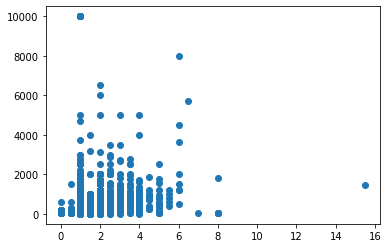

In [61]:
plt.scatter(df['bathrooms'], df['price'])

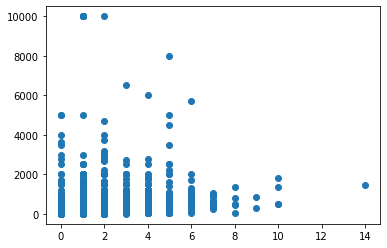

In [63]:
plt.scatter(df['bedrooms'], df['price'])

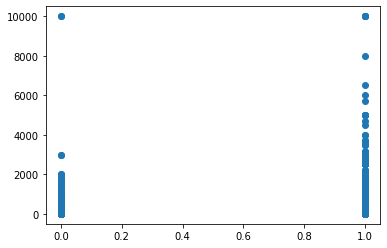

In [68]:
plt.scatter(df['wifi_access_num'], df['price'])

## Training our linear regression model

In [69]:
# X = df[['bathrooms', 'bedrooms', 'wifi_access_num', 'queens', 'bronx','brooklyn', 'staten_island', 'manhattan']]
# Y = df['price']

In [82]:
X = df[['bathrooms', 'bedrooms', 'accommodates', 'beds']]
Y = df['price']

In [70]:
Y.shape

(44317,)

In [83]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [84]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=False) #creating object for the class

#we reshape X_train values because fit needs a 2-D matrix
reg.fit(x_train.values, y_train.values.reshape(-1,1))

LinearRegression(fit_intercept=False)

In [86]:
score = reg.score(x_test.values, y_test.values.reshape(-1,1))

In [87]:
print(f'Score {score}')

Score 0.1072528346449747


In [88]:
y_pred = reg.predict(x_test.values)

In [89]:
y_pred

array([[120.33452231],
       [108.39608334],
       [120.33452231],
       ...,
       [120.33452231],
       [264.16333238],
       [206.65189331]])

In [ ]:
plt.scatter(X_test, y_test,  color='red') #actual data from test data
plt.plot(X_test, y_pred, color='blue', linewidth=2)  #
plt.xlabel("X test")
plt.ylabel("y test")
plt.title("Regression data")
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# df.to_sql("updated_airbnb2017", conn, if_exists="replace")